# General recipie for an ML project
0. Prep: Determine high-level goals, desired output, and relevant input. Collect data reasonably and ethically.
1. Exploratory data analysis: read files, display values and distributions for each variable, eliminate redundant or useless variables, add dummy varibles (if needed)
2. ML: Shortlist ML models, set up training loops for rigorous validation that avoids overfitting and underfitting for lots of random data splits
3. Synthesize: Find models that work well for different splits and random initializations; try to not be enamored by fluke models.
4. Test: Try to make sure that the data prep process is automated, so that it is deployable. Test only the most robust models.
5. Deploy and monitor.



# Upload data files

In [ ]:
# Import common libraries for data processing and ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data adapted from the Cardiotocography Data Set at UCI ML Repo
https://archive.ics.uci.edu/ml/datasets/Cardiotocography

Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318

In [ ]:
from google.colab import files # Colab-specific library to load files

uploaded = files.upload() # Upload file; here we will upload Parkinson's data

# NOTE: load BOTH train_data and test_data csv files

# Confirm upload
for fn in uploaded.keys(): 
  print('You uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_data_fetal_cardio.csv to train_data_fetal_cardio.csv
Saving test_data_fetal_cardio.csv to test_data_fetal_cardio.csv
You uploaded file "train_data_fetal_cardio.csv" with length 117331 bytes
You uploaded file "test_data_fetal_cardio.csv" with length 49289 bytes


# ALWAYS, first explore data through printing and visualization

In [ ]:
# Display header and a few rows

train_df = pd.read_csv('train_data_fetal_cardio.csv')
display(train_df)

test_df = pd.read_csv('test_data_fetal_cardio.csv')
display(test_df)

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Class
0,5,632,132,132,4,0,4,17,2.1,0,10.4,2,0,0,0,130,68,198,6,1,141,136,140,12,0,1
1,177,779,133,133,2,0,5,16,2.1,0,13.4,2,0,0,0,130,68,198,5,1,141,135,138,13,0,1
2,240,953,134,134,1,0,9,29,6.3,0,0.0,6,0,2,0,150,50,200,6,3,71,107,106,215,0,1
3,62,679,122,122,0,0,0,83,0.5,6,15.6,0,0,0,0,68,62,130,0,0,122,122,123,3,1,1
4,181,1192,122,122,0,0,3,86,0.3,6,10.6,0,0,0,0,68,62,130,1,0,122,122,123,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,790,1677,140,140,0,0,6,79,0.6,27,6.4,1,0,0,0,26,124,150,1,0,144,141,145,1,1,0
1493,1143,1947,140,140,0,0,4,77,0.7,17,6.0,1,0,0,0,31,124,155,2,0,145,143,145,2,0,0
1494,1576,2596,140,140,1,0,7,79,0.4,20,6.1,0,0,0,0,67,103,170,5,0,153,148,152,4,1,1
1495,1576,3049,140,140,1,0,9,78,0.4,27,7.0,0,0,0,0,66,103,169,6,0,152,147,151,4,1,1


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Class
0,240,357,120,120,0,0,0,73,0.5,43,2.4,0,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,411,1192,134,134,2,0,6,16,2.4,0,23.0,2,0,0,0,117,53,170,11,0,137,134,137,13,1,1
2,533,1147,132,132,4,0,5,16,2.4,0,19.9,0,0,0,0,117,53,170,9,0,137,136,138,11,1,0
3,0,953,134,134,1,0,10,26,5.9,0,0.0,9,0,2,0,150,50,200,5,3,76,107,107,170,0,1
4,120,779,122,122,0,0,1,84,0.5,5,13.6,0,0,0,0,68,62,130,0,0,122,122,123,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,1837,2459,136,136,0,3,4,63,2.2,0,5.0,5,0,1,0,85,67,152,6,0,134,116,128,53,1,1
625,455,707,140,140,1,0,1,80,0.2,36,2.2,0,0,0,0,18,140,158,1,0,147,148,149,1,0,0
626,595,1677,140,140,0,0,7,79,0.5,26,7.0,1,0,0,0,21,129,150,1,0,145,142,145,2,1,0
627,2059,2867,140,140,0,0,6,79,0.2,25,7.2,0,0,0,0,40,137,177,4,0,153,150,152,2,0,1


Observations:
1. Notice how different columns have difference scales (range, min, max etc.)

Next, we should:
1. Check the data type of each column
2. Check for missing values (NA)
3. Plot the histograms of the columns to see if there is a good spread

In [ ]:
print(train_df.dtypes) # Data types
print(test_df.dtypes)  # Data types to cross-check with train

b             int64
e             int64
LBE           int64
LB            int64
AC            int64
FM            int64
UC            int64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
DL            int64
DS            int64
DP            int64
DR            int64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
Class         int64
dtype: object
b             int64
e             int64
LBE           int64
LB            int64
AC            int64
FM            int64
UC            int64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
DL            int64
DS            int64
DP            int64
DR            int64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Varian

Observations: Good! All datatypes are int or float, i.e. numerical.

Next: Check if the features have diverse values

In [ ]:
for col in train_df.columns.values: # For each column
  list_vals = pd.unique(train_df[col])    # Create a list of unique values
  print(col + ' is of type ' + str(train_df[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(train_df[col]))) + ' null entries')
  if len(list_vals) < 10: # If the column has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])

b is of type int64, has 794 unique values, and 0 null entries
e is of type int64, has 881 unique values, and 0 null entries
LBE is of type int64, has 47 unique values, and 0 null entries
LB is of type int64, has 47 unique values, and 0 null entries
AC is of type int64, has 20 unique values, and 0 null entries
FM is of type int64, has 76 unique values, and 0 null entries
UC is of type int64, has 18 unique values, and 0 null entries
ASTV is of type int64, has 75 unique values, and 0 null entries
MSTV is of type float64, has 53 unique values, and 0 null entries
ALTV is of type int64, has 87 unique values, and 0 null entries
MLTV is of type float64, has 231 unique values, and 0 null entries
DL is of type int64, has 15 unique values, and 0 null entries
DS is of type int64, has 2 unique values, and 0 null entries
  These are: 0, 1
DP is of type int64, has 5 unique values, and 0 null entries
  These are: 0, 2, 1, 3, 4
DR is of type int64, has 1 unique values, and 0 null entries
  These are: 0

Observations:
1. None of the columns have any null entries
2. There are only 2 classes
3. Some of the predictor variables seem have lots of unique values, i.e. these can be treated as continuous variables.
4. Variable 'DR' has only one unique value. We will eliminate it later.

Next: Plot their distributions to visualize problems

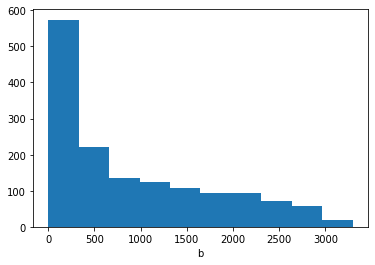

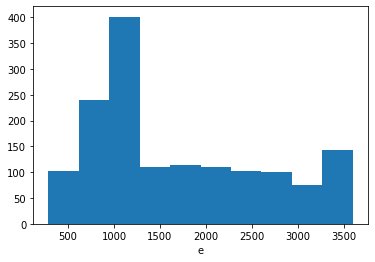

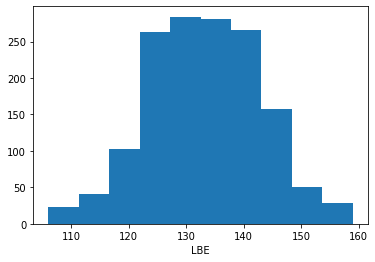

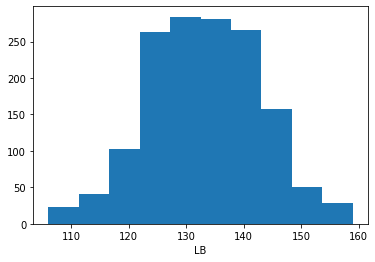

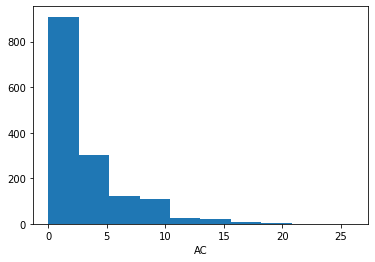

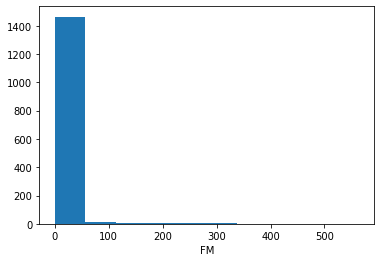

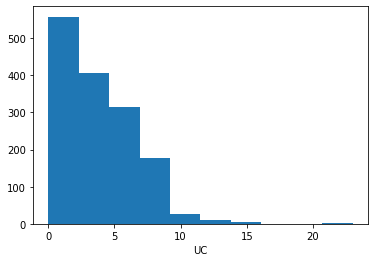

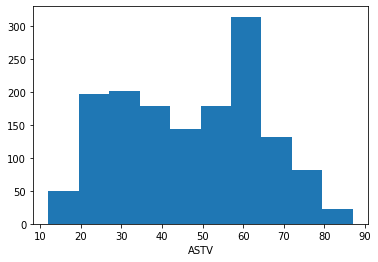

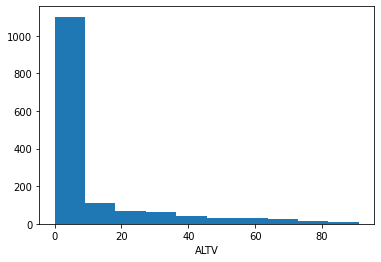

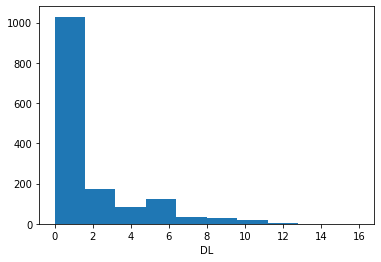

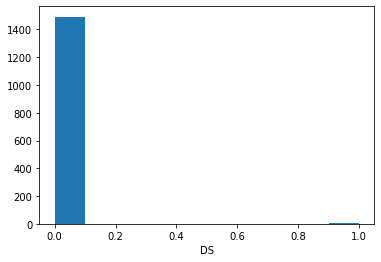

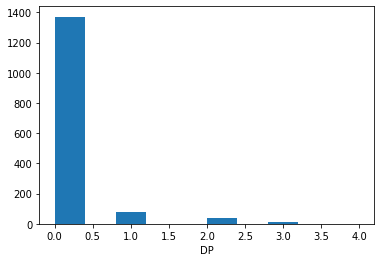

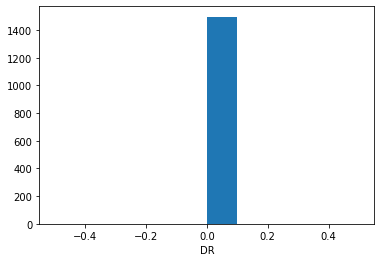

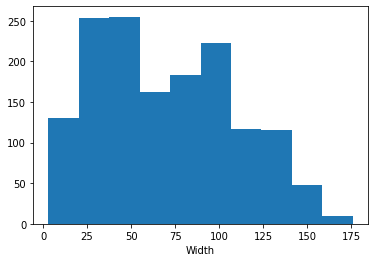

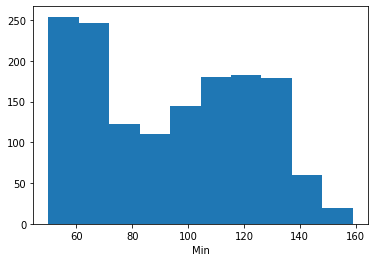

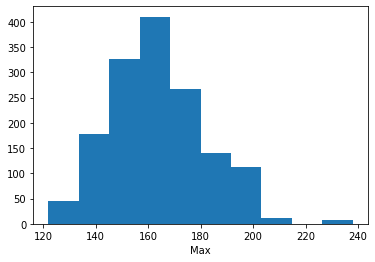

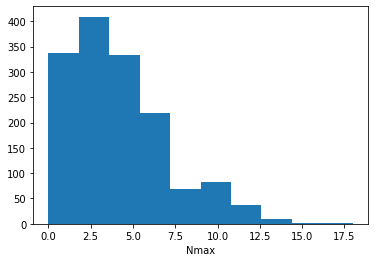

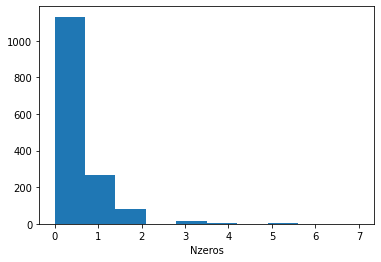

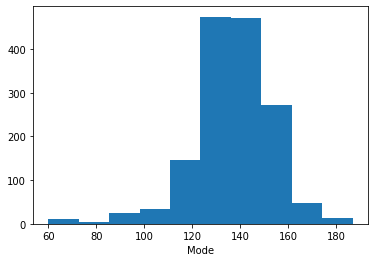

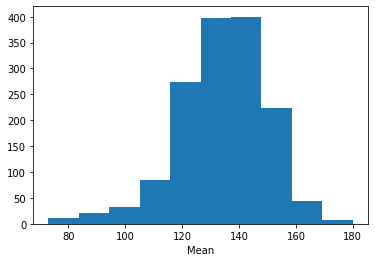

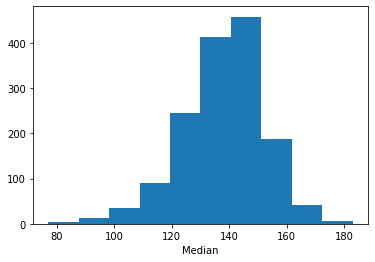

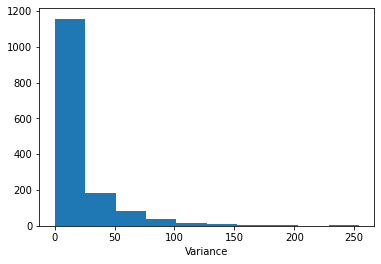

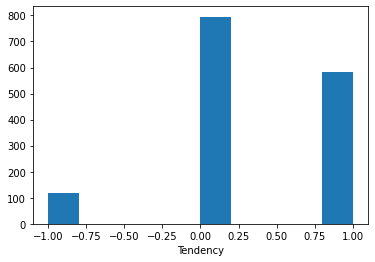

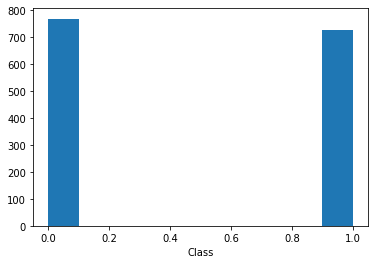

In [ ]:
# Plot histograms for discrete variables

for col in train_df.columns.values: # for all columns
  # if the values are integers or discrete
  if (train_df[col].dtypes == 'int64') | (train_df[col].dtypes == 'object'):
    plt.hist(train_df[col])
    plt.xlabel(col)
    plt.show()

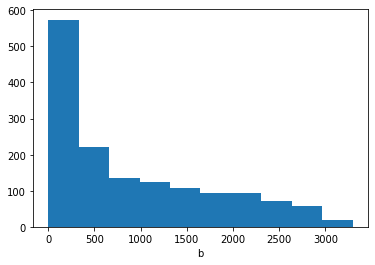

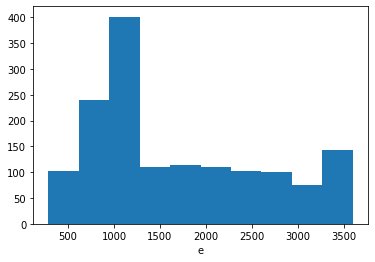

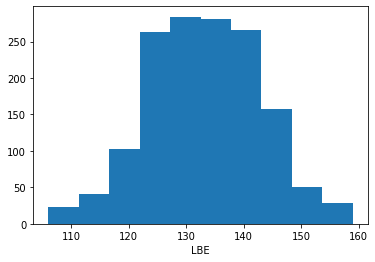

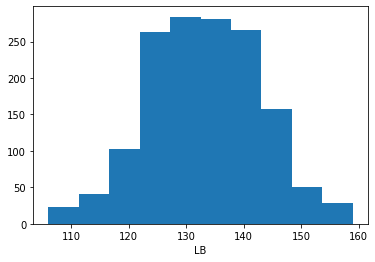

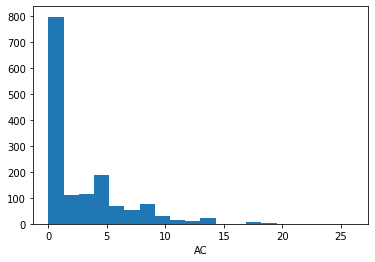

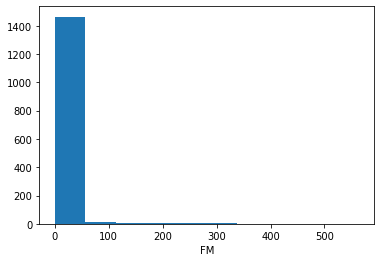

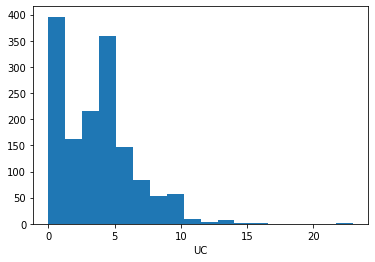

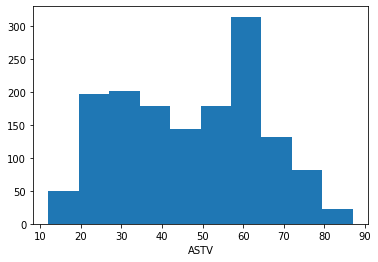

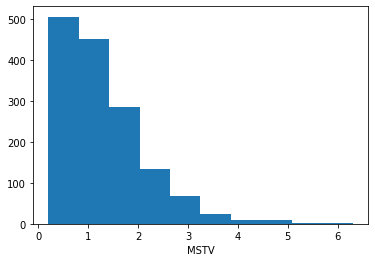

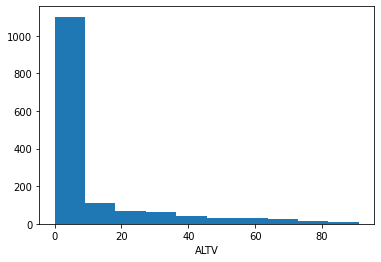

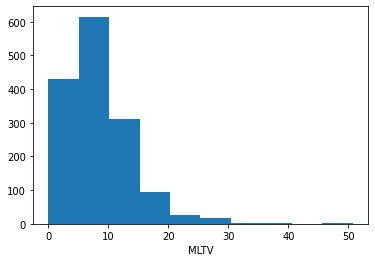

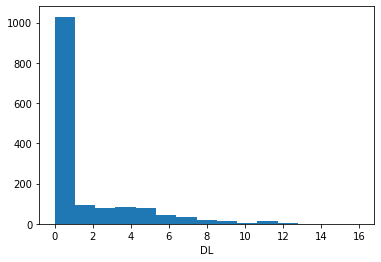

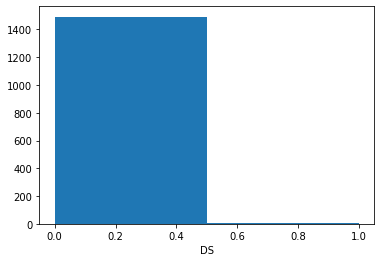

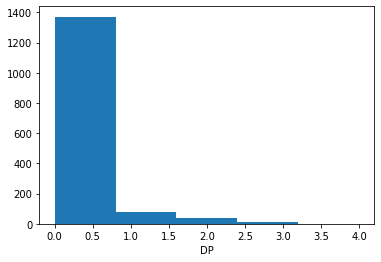

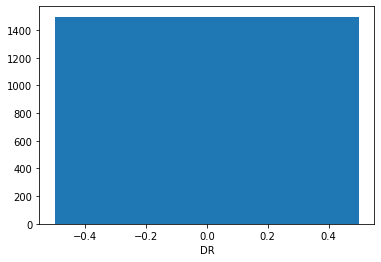

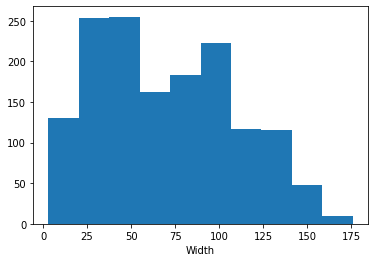

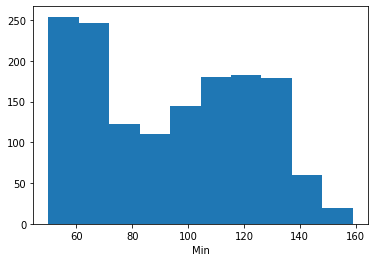

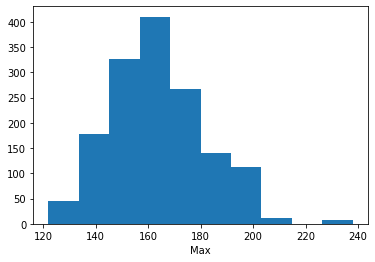

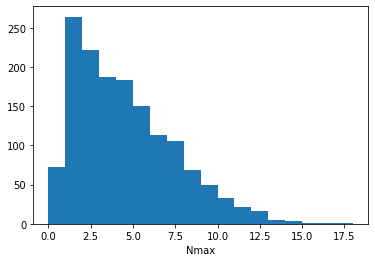

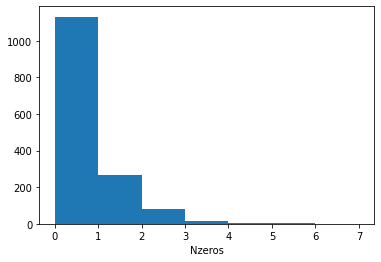

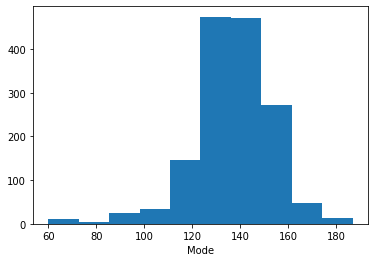

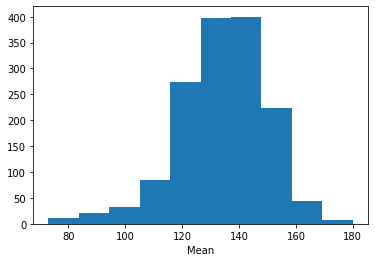

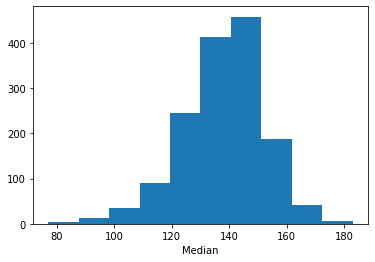

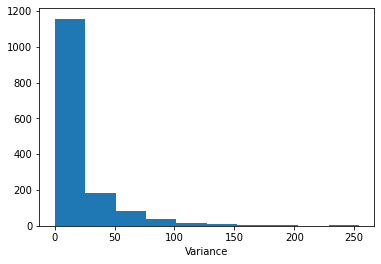

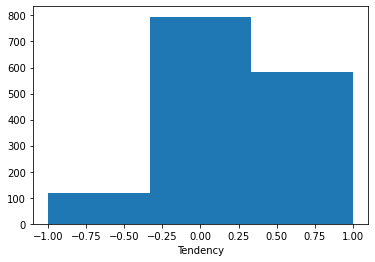

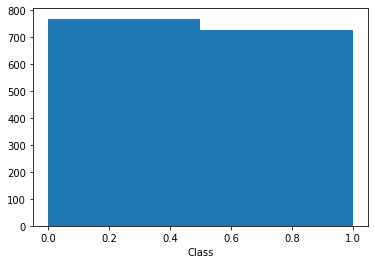

In [ ]:
# Plot histograms for continuous variables

for col in train_df.columns.values:
  if (train_df[col].dtypes == 'int64') | (train_df[col].dtypes == 'float64'):
    plt.hist(train_df[col],10 if len(pd.unique(train_df[col]))>20 else len(pd.unique(train_df[col])))
    plt.xlabel(col)
    plt.show()

Observation: All variables except DR seem to be spread well. Drop DR

Next: Plot pair-wise scatter plots

In [ ]:
# Drop unvarying data column from both train and test
# Dropping this is necessary for the next step - computing correlations.
# Else, there will be an error

train_df = train_df.drop(['DR'], axis = 1) 
test_df = test_df.drop(['DR'], axis = 1) 

In [ ]:
# We can also plot pair-wise scatter matrices (lazy coding)

from pandas.plotting import scatter_matrix
scatter_matrix(train_df, alpha=0.2, figsize=(26, 26), diagonal='kde') # kde is kernel density estimation

Output hidden; open in https://colab.research.google.com to view.

1. Variable pairs whose scatter look like straight lines or thin curves are correlated. Some of those should be eliminated.
2. Variables whose scatter show multiple vertical or horizontal lines are heavily quantized; just, FYI.
3. For clustering, we are interested in distinct point-groups in scatter plots. Sometimes it is obvious from these scatter plots

Next: Plot the correlation matrix to see it better. Note that a perfect negative correlation is also a perfect correlation. So, we are interested in abs value


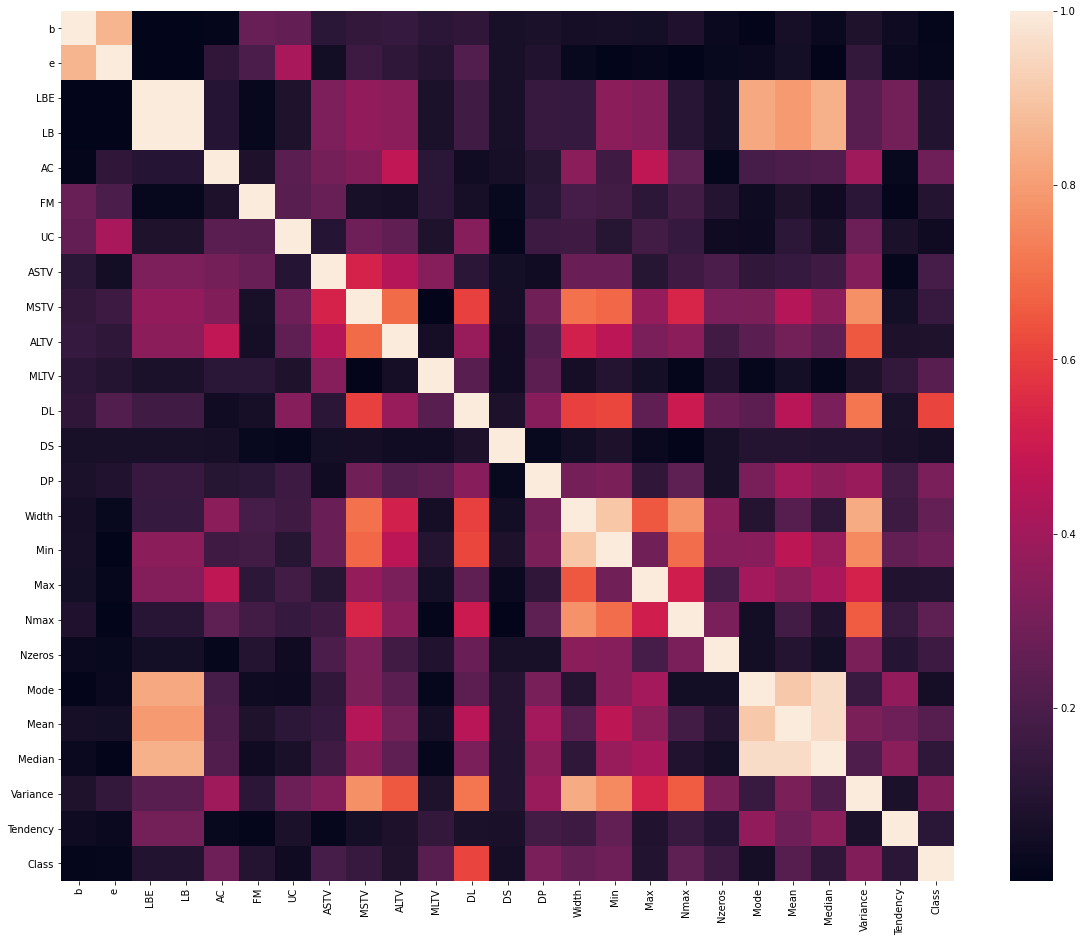

In [ ]:
corrMatrix = train_df.corr(method='spearman') # Use spearman for non-linear
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix), annot=False) # Show absolute value
plt.show()

Observation: There are some redundant variables, which we will rationalize later.

Next: See if the distribution of each variable varies by class.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

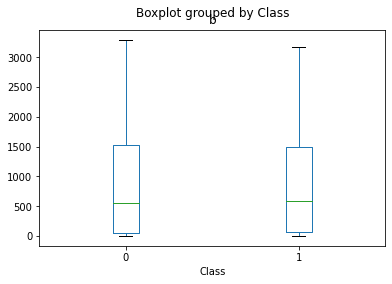

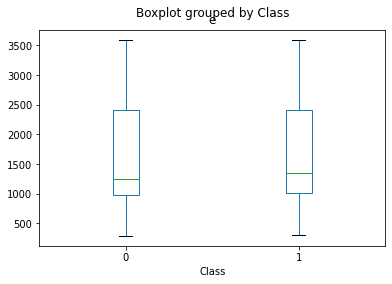

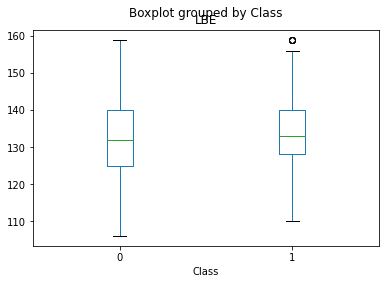

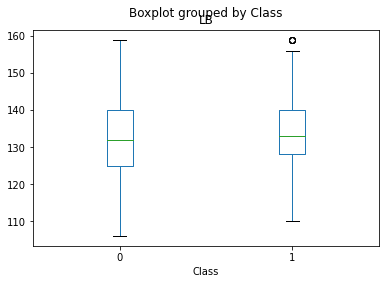

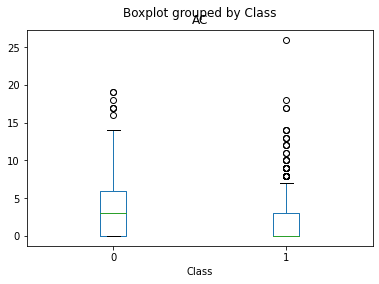

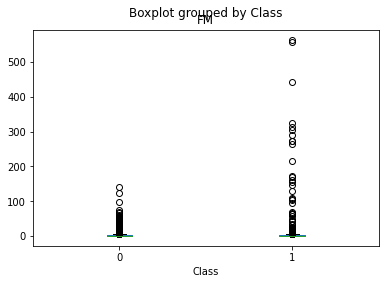

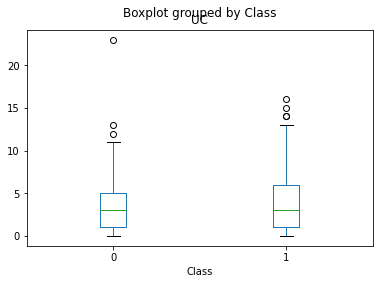

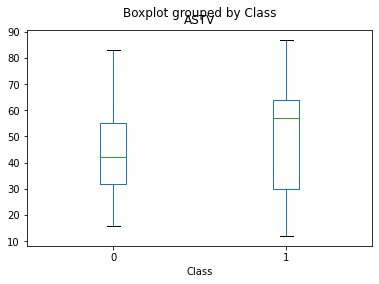

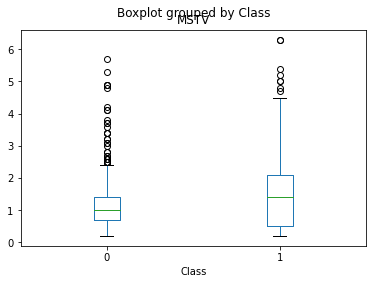

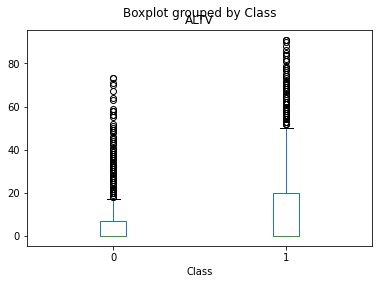

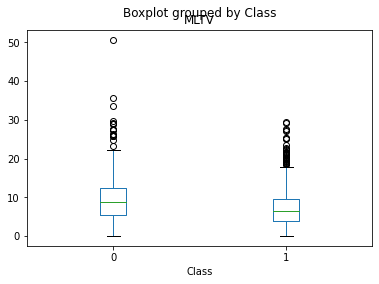

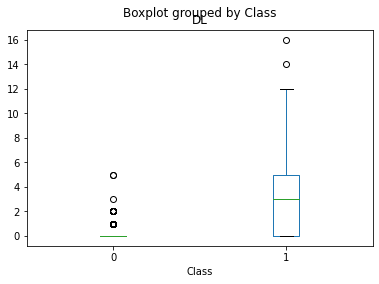

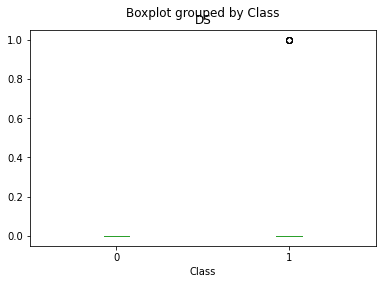

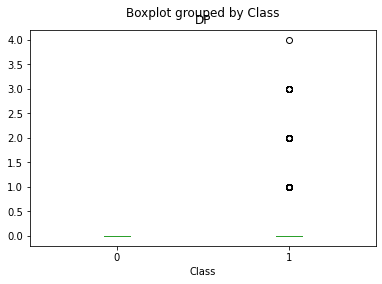

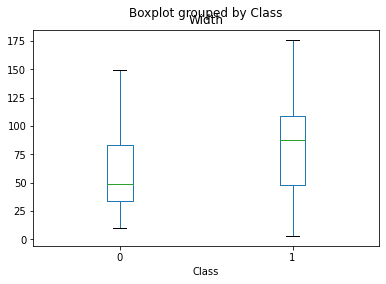

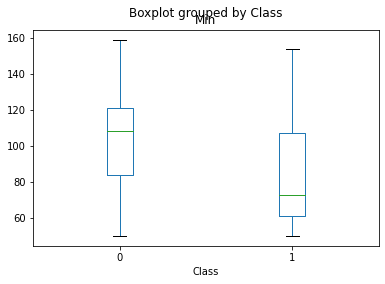

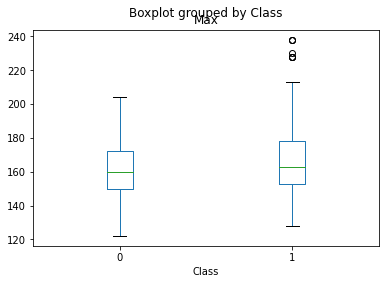

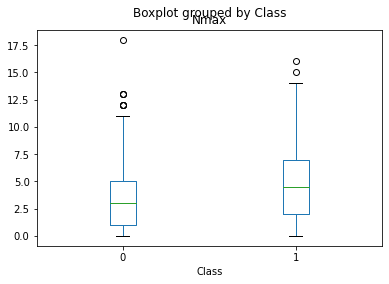

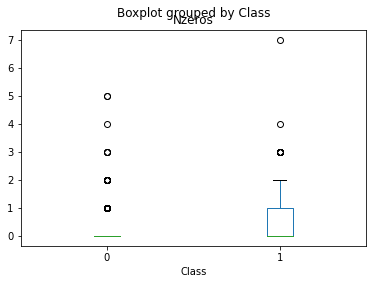

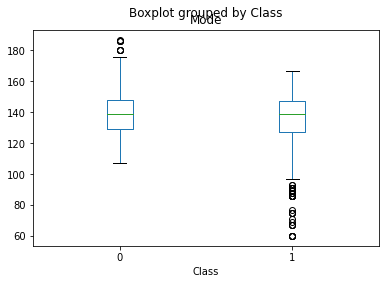

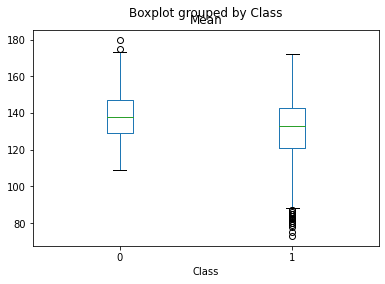

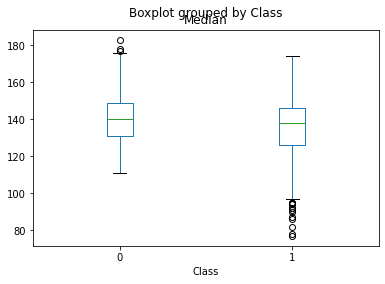

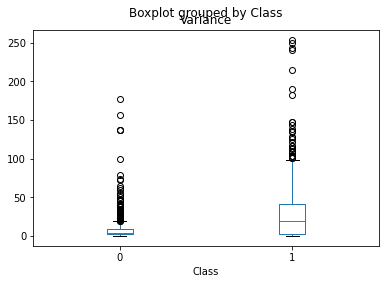

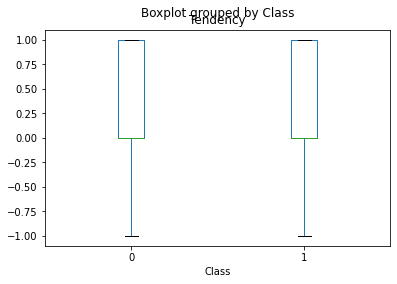

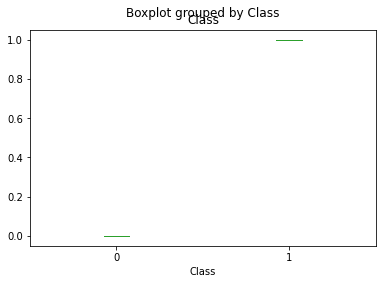

In [ ]:
# Plot side-by-side boxplot for each variable to find which ones are likely to help predict classes

for col in train_df.columns.values:
  train_df.boxplot(by='Class', column=col,grid=False)

1. Do not get confused by Class, which is redundant with class
2. But, bingo! Looks like there are discriminatory variables with non-overlapping side-by-side boxplots, such as 'variance'

# Prepare data
1. Eliminate useless columns (redundant, unvarying (e.g. 'DR'), or lots of missing entries)
2. Convert discrete variables into one-hot-bit (dummy); none in this data
3. Normalize ranges so that no variable has a disproportionate sway on the model

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.153351,0.363067,-1.721155,0.867792,-0.535016,0.174268,1.543261,1.909796,0.657924,0.988026,0.142225,-0.232743
1,-0.995294,-0.201914,-1.778947,0.867792,-0.535016,0.174268,1.543261,1.909796,0.318533,0.988026,0.004686,-0.198342
2,-0.808206,-0.484404,-1.027659,5.645513,-0.535016,1.777213,2.057705,2.021518,0.657924,3.943222,-2.195938,6.750730
3,-1.102816,-0.766894,2.093074,-0.952292,-0.210911,-0.627205,-0.051513,-1.888750,-1.378422,-0.489572,-1.026857,-0.542356
4,-0.551229,-0.766894,2.266448,-1.179802,-0.210911,-0.627205,-0.051513,-1.888750,-1.039031,-0.489572,-1.026857,-0.611158
...,...,...,...,...,...,...,...,...,...,...,...,...
1492,-0.029748,-0.766894,1.861908,-0.838537,0.923460,-0.226468,-1.131844,-0.771531,-1.039031,-0.489572,0.486072,-0.611158
1493,0.260560,-0.766894,1.746326,-0.724781,0.383283,-0.226468,-1.003233,-0.492226,-0.699640,-0.489572,0.486072,-0.576757
1494,0.958377,-0.484404,1.861908,-1.066047,0.545336,-0.627205,-0.077235,0.345689,0.318533,-0.489572,0.967459,-0.507954
1495,1.445451,-0.484404,1.804117,-1.066047,0.923460,-0.627205,-0.102957,0.289828,0.657924,-0.489572,0.898689,-0.507954


0    -2.303509e-16
1    -1.085749e-15
2     2.060254e-16
3     1.860013e-16
4     2.140350e-15
5     6.431432e-16
6    -5.747648e-17
7     6.174086e-17
8     3.930649e-17
9    -1.915635e-16
10    1.072548e-15
11   -4.016679e-16
dtype: float64


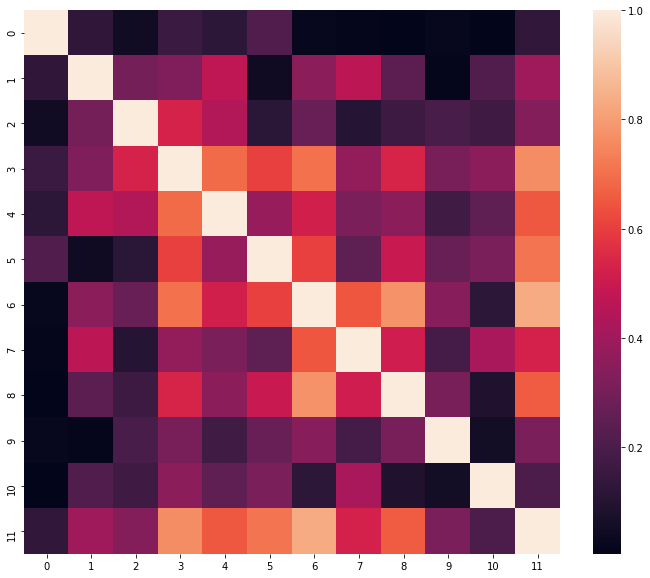

In [ ]:
# Normalize data (shift and scale so that columns are zero mean and unit variance)
from sklearn import preprocessing

scaler = preprocessing.StandardScaler() # For data normalization

#cols_to_retain = train_df.columns[0:25].values
cols_to_retain = ['e','AC','ASTV','MSTV','ALTV','DL','Width','Max','Nmax','Nzeros','Median','Variance']
# We just specified which columns we will keep. Those left out are correlated to some of these.

scaler.fit(train_df[cols_to_retain]) # Compute mean and std
train_X = pd.DataFrame(scaler.transform(train_df[cols_to_retain])) # Use mean and std
train_Y = pd.DataFrame(train_df['Class'])
display(train_X)
print(train_X.mean())

corrMatrix = train_X.corr(method='spearman') # Check correlation again
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(abs(corrMatrix), annot=False)
plt.show()

Observations: 
1. All means are zeros, and hopefully all std devs are 1. 
2. Variables selected seem uncorrelated to each other.

Next: Transform test data with the automation that worked for the training data.

Warning! Do not re-fit scaler; and do not introduce new preprocessing steps. Otherwise, your testing cannot be automated.

Warning! Do not take previous warning as sacrosanct. There are situations where the test data needs to be re-normalized, such as when there is a covariate shift due to use of different equipment to collect data for testing than for training. However, this is not the case for this data.

In [ ]:
# Normalize test data using the same scaler that was fitted on training.

test_X = pd.DataFrame(scaler.transform(test_df[cols_to_retain]))
test_Y = pd.DataFrame(test_df['Class'])
display(test_X)
print(test_X.mean())

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.449036,-0.766894,1.515160,-0.952292,1.787742,-0.627205,-0.154402,-2.112194,-0.699640,-0.489572,-1.164396,1.865739
1,-0.551229,-0.201914,-1.778947,1.209058,-0.535016,0.174268,1.208873,0.345689,2.354879,-0.489572,-0.064084,-0.198342
2,-0.599614,0.363067,-1.778947,1.209058,-0.535016,-0.627205,1.208873,0.345689,1.676097,-0.489572,0.004686,-0.267145
3,-0.808206,-0.484404,-1.201033,5.190492,-0.535016,2.979422,2.057705,2.021518,0.318533,3.943222,-2.127169,5.202670
4,-0.995294,-0.766894,2.150865,-0.952292,-0.264928,-0.627205,-0.051513,-1.888750,-1.378422,-0.489572,-1.026857,-0.542356
...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.811072,-0.766894,0.937247,0.981547,-0.535016,1.376477,0.385764,-0.659809,0.657924,-0.489572,-0.683009,1.177712
625,-1.072710,-0.484404,1.919700,-1.293558,1.409619,-0.627205,-1.337622,-0.324643,-1.039031,-0.489572,0.761150,-0.611158
626,-0.029748,-0.766894,1.861908,-0.952292,0.869442,-0.226468,-1.260455,-0.771531,-1.039031,-0.489572,0.486072,-0.576757
627,1.249761,-0.766894,1.861908,-1.293558,0.815425,-0.627205,-0.771734,0.736715,-0.020858,-0.489572,0.967459,-0.576757


0    -0.006506
1     0.007372
2     0.040608
3    -0.016750
4    -0.010556
5     0.006711
6     0.038535
7     0.040363
8     0.007740
9    -0.038540
10    0.036829
11    0.004949
dtype: float64


Observation: The means are no longer zero, because we did not re-fit, and that might be okay for this data.

# Rigorous training and validation

In [ ]:
# First we will use an automated grid-search over range of hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score # ROC-AUC and F1 are balanced metrics

print('Training SVC using GridSearchCV')
scoring = 'f1'

from sklearn import svm # We will try SVM
hyperparameters = {'kernel':('rbf', 'linear', 'poly'), 'C':[.1, 1, 10], 'degree':[3,5,8]}
# These are the hyper-parameters that we will try

svc = svm.SVC()
clf = GridSearchCV(estimator=svc, param_grid=hyperparameters, scoring=scoring)
clf.fit(np.array(train_X), np.squeeze(train_Y))
print('Best parameters:')
print(clf.best_params_)
print('Best ' + scoring + ": " + str(clf.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), clf.predict(np.array(test_X))
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: ' + str(roc_auc_score(y_true, y_pred)))

Training SVC using GridSearchCV
Best parameters:
{'C': 1, 'degree': 3, 'kernel': 'rbf'}
Best f1: 0.8719980545095292
Test classification report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       328
           1       0.91      0.90      0.90       301

    accuracy                           0.91       629
   macro avg       0.91      0.91      0.91       629
weighted avg       0.91      0.91      0.91       629

Test AUC-ROC: 0.9074831861275424


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() # Now, we will try random forest
hyperparameters = {'max_depth':[2,5,10,20],'n_estimators':[10,30,100]}
clf = GridSearchCV(rfc, param_grid=hyperparameters, scoring=scoring)
clf.fit(np.array(train_X), np.squeeze(train_Y))
print('Best parameters:')
print(clf.best_params_)
print('Best ' + scoring + ": " + str(clf.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), clf.predict(np.array(test_X))
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: ' + str(roc_auc_score(y_true, y_pred)))

Best parameters:
{'max_depth': 20, 'n_estimators': 100}
Best f1: 0.8939876847193149
Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       328
           1       0.96      0.93      0.94       301

    accuracy                           0.95       629
   macro avg       0.95      0.95      0.95       629
weighted avg       0.95      0.95      0.95       629

Test AUC-ROC: 0.946960335467142


Trying log C = -3
Trying log C = -2
Trying log C = -1
Trying log C = 0
Trying log C = 1
Trying log C = 2
Trying log C = 3
Trying log C = 4
Trying log C = 5
Trying log C = 6
Trying log C = 7
Trying log C = 8
[0.87076721 0.88341965 0.90205538 0.91227024 0.92065177 0.92025536
 0.9073149  0.91018342 0.91279674 0.90547589 0.9025461  0.90677271]
[4.97870684e-02 1.35335283e-01 3.67879441e-01 1.00000000e+00
 2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03]


Text(0, 0.5, 'Typical AUC')

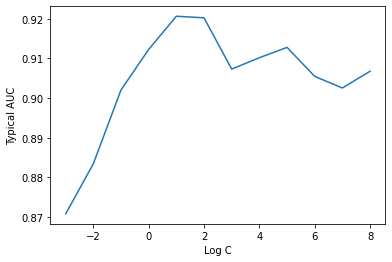

In [ ]:
# Custom hyperparameter tuning, using bootstrapping

import sklearn.model_selection as model_selection

n_trials = 25 # Number of bootstrapped samples
svc_log_C = np.arange(-3,9) # Hyperparameter range
n_params = svc_log_C.shape[0]

AUCs = np.zeros([n_params,n_trials])

for n_param in np.arange(n_params): # Loop over hyperparameters
  print('Trying log C = '+ str(svc_log_C[n_param]))
  for n_trial in np.arange(0,n_trials): # Conduct bootstrapped trials
    # First create a split such as 80-20
    X_train, X_test, y_train, y_test = model_selection.train_test_split(train_X, train_Y, train_size=0.8) 
    
    # Now train and predict on test
    svc = svm.SVC(kernel='rbf', C=np.exp(svc_log_C[n_param]),probability=True)
    svc.fit(X_train, np.squeeze(y_train))
    y_pred = svc.predict(X_test)

    # Compute a balanced metric such as AUC or F1 score
    AUCs[n_param,n_trial] = roc_auc_score(np.squeeze(y_test), y_pred)

typical_AUC = np.mean(AUCs,1) # Compute mean metric for the trials

print(typical_AUC)
print(np.exp(svc_log_C))

plt.plot(svc_log_C,typical_AUC)
plt.xlabel('Log C')
plt.ylabel('Typical AUC')

Observation: Metric peaks, then decreases, indicating a sweet-spot between over- and under-fitting.

Next: Try another hyperparameter

Trying log gamma = -5
Trying log gamma = -4
Trying log gamma = -3
Trying log gamma = -2
Trying log gamma = -1
Trying log gamma = 0
Trying log gamma = 1
[0.87413    0.89154099 0.91153948 0.91539888 0.90551148 0.88090965
 0.8272768 ]
[0.00673795 0.01831564 0.04978707 0.13533528 0.36787944 1.
 2.71828183]


Text(0, 0.5, 'Typical AUC')

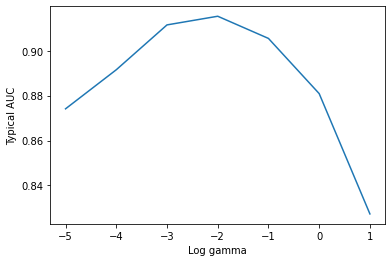

In [ ]:
n_trials = 25
svc_log_gamma = np.arange(-5,2) # Hyperparameter is kernel width gamma
n_params = svc_log_gamma.shape[0]

AUCs = np.zeros([n_params,n_trials])

for n_param in np.arange(n_params):
  print('Trying log gamma = '+ str(svc_log_gamma[n_param]))
  for n_trial in np.arange(0,n_trials):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(train_X, train_Y, train_size=0.8) 
    svc = svm.SVC(kernel='rbf', C=np.exp(0), gamma=np.exp(svc_log_gamma[n_param]),probability=True)
    svc.fit(X_train, np.squeeze(y_train))
    y_pred = svc.predict(X_test)
    AUCs[n_param,n_trial] = roc_auc_score(np.squeeze(y_test), y_pred)

typical_AUC = np.mean(AUCs,1)

print(typical_AUC)
print(np.exp(svc_log_gamma))

plt.plot(svc_log_gamma,typical_AUC)
plt.xlabel('Log gamma')
plt.ylabel('Typical AUC')

Observation: Metric peaks, then decreases, indicating a sweet-spot between over- and under-fitting.

Next: Retrain using all training data and best hyperparameter, and test

In [ ]:
print('Test classification report:')
svc = svm.SVC(kernel='rbf', C=np.exp(1), gamma=np.exp(-2),probability=True)
svc.fit(train_X, np.squeeze(train_Y))
y_true, y_pred = np.squeeze(test_Y), svc.predict(np.array(test_X))
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: ' + str(roc_auc_score(y_true, y_pred)))

Test classification report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       328
           1       0.91      0.93      0.92       301

    accuracy                           0.92       629
   macro avg       0.92      0.92      0.92       629
weighted avg       0.92      0.92      0.92       629

Test AUC-ROC: 0.9238210031601978


# Let us see the same process of fitting in clustering

Assume that the class labels are not to be used, i.e. for clustering

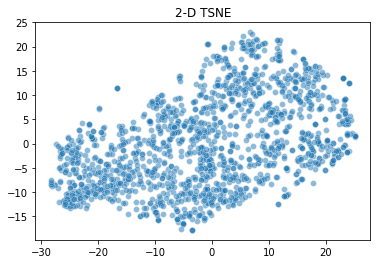

In [ ]:
# Visualize using a low-dimensional embedding such as t-sne

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100) # You can play with perplexity
tsne_dims = tsne.fit_transform(np.array(train_X))

#plt.plot(tsne_dims[:,0],tsne_dims[:,1])
sns.scatterplot(x=tsne_dims[:,0], y=tsne_dims[:,1], alpha=.5) 
plt.title('2-D TSNE')
plt.show()

Estimated number of clusters: 6


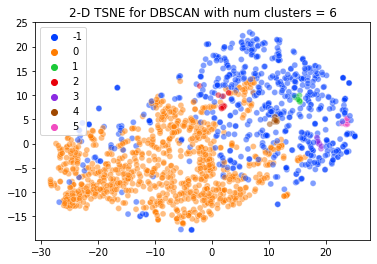

In [ ]:
# Let us try a fancy clustering algorithm -- DBSCAN

from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1.5, min_samples=8).fit(train_X)
# Play with eps and min_samples, which are hyperparameters

labels = clustering.labels_
unique_labels = set(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
n_noise_ = list(labels).count(-1)

sns.scatterplot(x=tsne_dims[:,0], y=tsne_dims[:,1], hue=labels,palette = 'bright', alpha=0.5)

plt.title('2-D TSNE for DBSCAN with num clusters = %d' % n_clusters_)
plt.show()

Observation: Results are not intuitive.

Next: Try k-means for different values of k

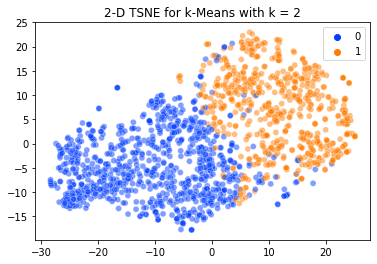

For 0 clusters, score is 1.683766 and purity is 0.377422


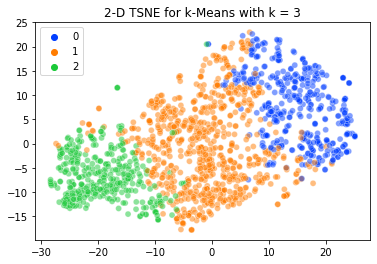

For 1 clusters, score is 1.767569 and purity is 0.508350


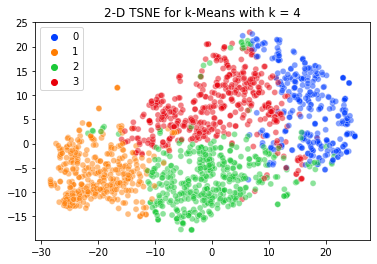

For 2 clusters, score is 1.732253 and purity is 0.492318


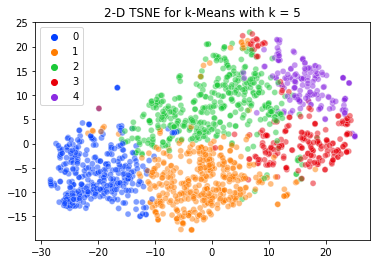

For 3 clusters, score is 1.823352 and purity is 0.565798


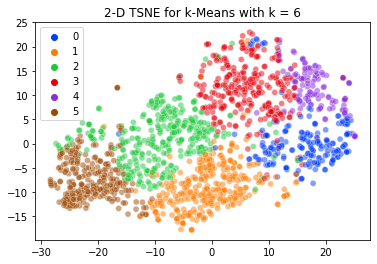

For 4 clusters, score is 1.783486 and purity is 0.533734


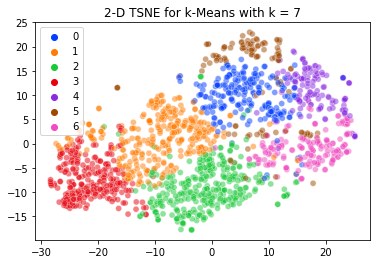

For 5 clusters, score is 1.750327 and purity is 0.561790


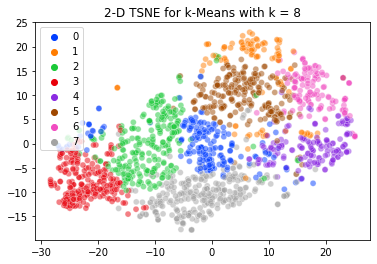

For 6 clusters, score is 1.679772 and purity is 0.543086


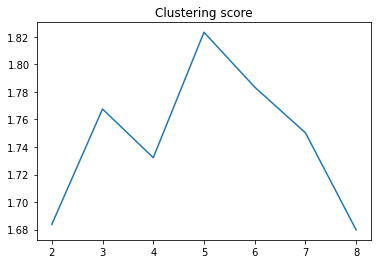

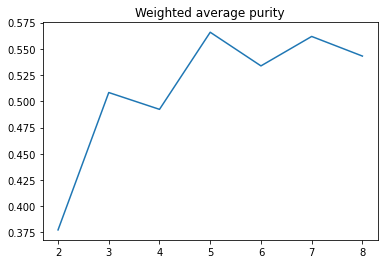

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

k_range = np.arange(2,9) # Range of k-values
trials_per_k = 5 # We will randomly initialize multiple times just to be sure

total_k = k_range.shape[0]
score = np.zeros(total_k)
avg_purity = np.zeros(total_k)

for k_num in range(0,total_k): # For each k
  kmeans = KMeans(n_clusters = k_range[k_num]) # Initialize clusterer

  trial_score = np.zeros(trials_per_k) # Metric such as Davies Bouldin or silhouette score
  trial_purity = np.zeros(trials_per_k) # Cross-checking with classification labels

  for trial in range(0,trials_per_k): # For each trial
    labels = kmeans.fit_predict(train_X) # Fit and predict k-means
    trial_score[trial] = metrics.davies_bouldin_score(train_X, labels)

    # Find average class label
    # For pure classes, it should be close to 0 or 1, but not 0.5
    # This method only works for balanced classes
    for label in range(0,k_range[k_num]): # For all clusters
      cluster_labels = train_Y.loc[labels == label] # Select locations for this cluster
      trial_purity[trial] += np.abs(1.0 - 2.0*np.mean(cluster_labels)) * cluster_labels.shape[0] / train_Y.shape[0]

  score[k_num] = np.median(trial_score) # Compute typical value across trials
  avg_purity[k_num] = np.median(trial_purity) # Compute typical value across trials
  sns.scatterplot(x=tsne_dims[:,0], y=tsne_dims[:,1], hue=labels,palette = 'bright', alpha=0.5)
  plt.title('2-D TSNE for k-Means with k = ' + str(k_range[k_num]))
  plt.show()

  print('For %d clusters, score is %f and purity is %f' % (k_num, score[k_num], avg_purity[k_num]))

plt.plot(k_range,score)
plt.title('Clustering score')
plt.show()

plt.plot(k_range,avg_purity)
plt.title('Weighted average purity')
plt.show()

Observation: Davies-Bouldin peaks for k=5, and that is also where purity saturates. This was not necessary though.